<h5>Plotando curva de histerese para cada ângulo (sem normalização).</h5>
<p>O script a seguir varre o diretorio onde estão localizados os arquivos .txt contendo as medidas cruas obtidas no VSM e plota eles num gráfico. Assim, é possível visualizar quais conjuntos de medidas apresentam drift, que podem ser ajustadas utilizando o script <code>faseB_histereseAjusteDeDrift</code>.</p>

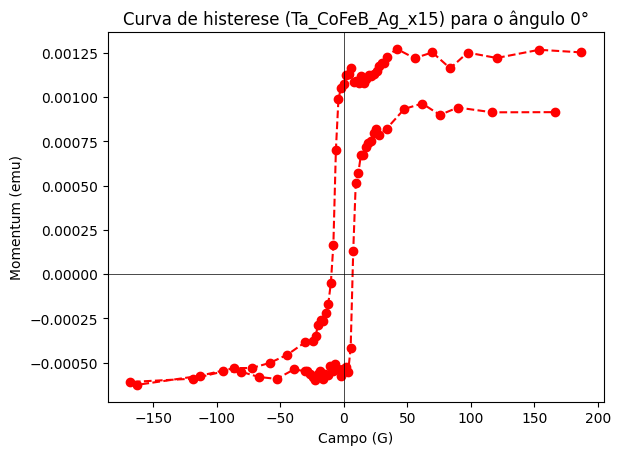

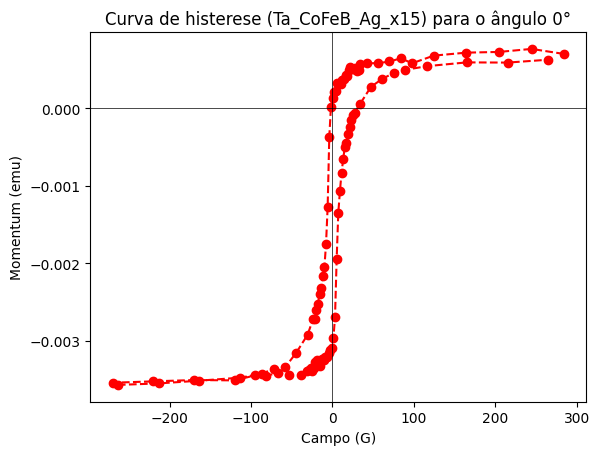

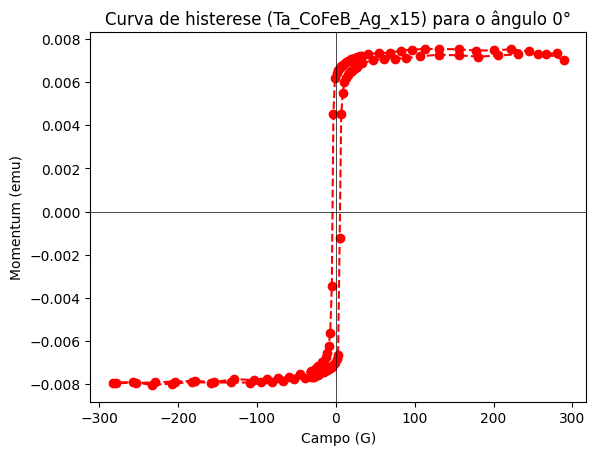

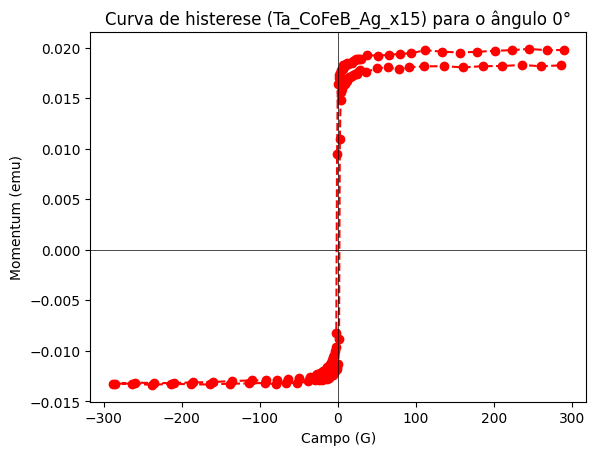

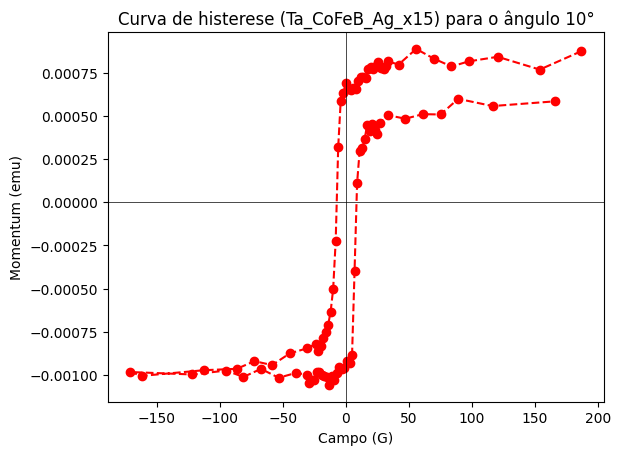

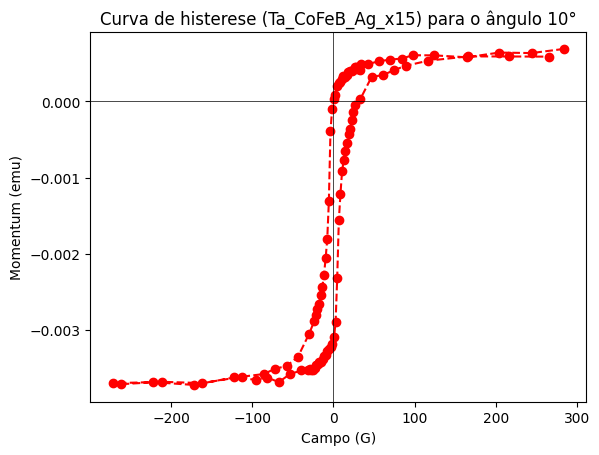

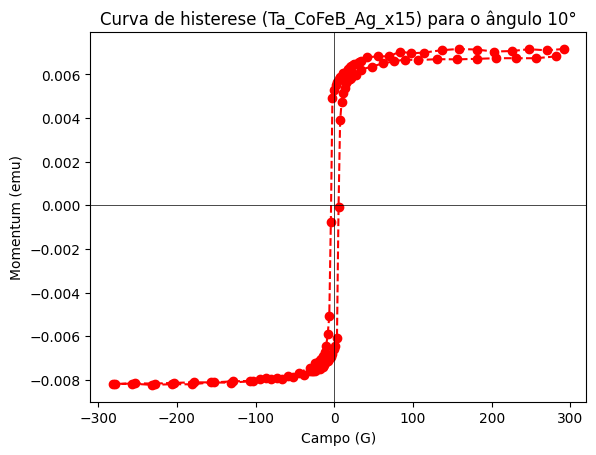

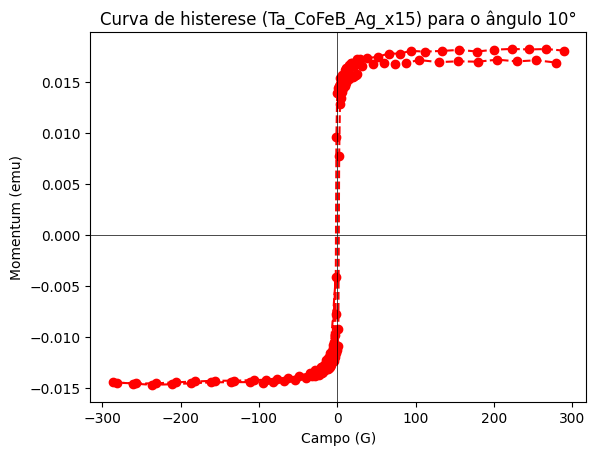

KeyboardInterrupt: 

In [21]:
"""
CARREANDO MÓDULOS NECESSÁRIOS
"""

import numpy as np #biblioteca usada para manipulação de matrizes e aplicações matemáticas -CLEIZA #type: ignore
import matplotlib.pyplot as plt #bibioteca para plot de figuras -CLEIZA #type: ignore
import os #biblioteca para manipulação de diretórios e arquivos -CLEIZA
from caminhosDosDiretorios import diretorioDeDadosDesteDispositivo as caminhoDiretorio #chamamos aqui uma variavel string global localizada num arquivo, caminhoDosDiretorios.py, que guarda o caminho do diretório onde estão os arquivos de dados deste dispositivo -ABQ

"""
CHAMANDO E RECONHECENDO DADOS
"""


# Lista todos os arquivos na pasta -CLEIZA
arquivos = os.listdir(caminhoDiretorio)

# Filtra apenas os arquivos .txt -CLEIZA
arquivos_txt = [arquivo for arquivo in arquivos if arquivo.endswith('.txt')]

# Função para extrair o ângulo do nome do arquivo. Para aplicação da função é necessário que os arquivos .txt estejam nomeados seguindo o exemplo:Ta_CoFeB_Ag_x15_00. Ou seja, com os últimos dígitos referenciando o ângulo de cada medida -CLEIZA
def extrair_angulo(nome_arquivo):
    partes = nome_arquivo.split('_')
    angulo_str = partes[-1].split('.')[0]
    return int(angulo_str)

# Ordena os arquivos pelo ângulo -CLEIZA
arquivos_txt.sort(key=extrair_angulo)

"""
DEFININDO CARACTERÍSTICAS DAS FIGURAS (OPTATIVO)
"""

# Define o tamanho da figura (opcional) -CLEIZA
#fig_size = (10, 8)

# Define o tamanho da fonte dos rótulos dos eixos x e y -CLEIZA
#fonte_eixos = 14

# Define o tamanho da fonte dos títulos -CLEIZA
#fonte_titulo = 16

# Define o tamanho dos números nos eixos x e y -CLEIZA
#tamanho_numeros = 12

# Define o tamanho da fonte da legenda -CLEIZA
#tamanho_legenda = 12


# Itera sobre os arquivos para criar os gráficos
for arquivo_txt in arquivos_txt:
    # Extrai o ângulo do nome do arquivo
    angulo = extrair_angulo(arquivo_txt)

    # Caminho completo do arquivo
    caminho_arquivo = os.path.join(caminhoDiretorio, arquivo_txt)
    
    # Carrega os dados do arquivo, ignorando 12 linhas
    dados = np.loadtxt(caminho_arquivo, skiprows=12)

    # Extrai os dados de campo e magnetização
    campo = dados[:, 0]
    magnetizacao = dados[:, 1]
    
    # Cria uma nova figura com tamanho definido (optativo)
    #plt.figure(figsize=fig_size)
    
    # Plota a curva de histerese
    plt.plot(campo, magnetizacao, "--o", color='red')

    # Adiciona linhas de eixo
    plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização
    plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo

    # Adiciona grade ao gráfico (optativo)
    #plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')
    #plt.grid(True, which='major', axis='both', color='gray', linewidth=0.5)
    
    # Adiciona título e rótulos com tamanho de fonte personalizado -CLEIZA
    plt.xlabel('Campo (G)') #optativamente, adicione aqui o argumento "fontsize=fonte_eixos" -ABQ
    plt.ylabel('Momentum (emu)') #optativamente, adicione aqui o argumento "fontsize=fonte_eixos" -ABQ
    plt.title(f'Curva de histerese (Ta_CoFeB_Ag_x15) para o ângulo {angulo}°') #optativamente, adicione aqui o argumento "fontsize=fonte_titulo" -ABQ
    
    # Define o tamanho dos números nos eixos x e y (optativo) -CLEIZA
    #plt.tick_params(axis='both', which='major', fontsize=tamanho_numeros)
    
    # Adiciona legenda com tamanho de fonte personalizado e posição à esquerda (optativo) -CLEIZA
    #plt.legend(fontsize=tamanho_legenda, loc='upper left')
    
    # Exibe o gráfico -CLEIZA
    plt.show()